In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Advanced Python

In this notebook, we refresh some of the ideas you have seen before and perhaps introduce some new ones.

Please read over this notebook. You should run each code cell to see the output. When there are challenges, you can produce a solution in the code cell directly below.

## Strings

Okay, you have seen strings before, but in this course we'll use f-strings. If we want to print a message with a value, we can do that using Python3's f-strings:

In [ ]:
pi = 3.14159265359
print(f"pi is equal to {pi}")

Note the `f` in front of the string - this makes it an f-string. You can also define a format, say you wanted to only print 2 decimal places

In [ ]:
print(f"pi is equal to {pi:0.2f}")

Or, if you have a big number and you want to use exponent notation

In [1]:
big_number = 18947598428945.945
print(f"My big number is {big_number:0.4g}")

My big number is 1.895e+13


You can learn more about these formats in the [documentation](https://docs.python.org/3/library/string.html#formatspec). 

<div class="alert alert-block alert-danger">
<b>Challenge 1.1:</b> Use f-strings and the "Scientific notation" discussed in the documentation above to print the value of the gravitational constant in SI: $6.67430\times10^{-11}$ N/m$^2$/kg$^2$" to 3 significant figures.
</div>

In [11]:
number = 6.67430*(10**(-11))
print(f"gravitational constant is {number: 0.3g}, [N/m^2/kg^2]")

gravitational constant is  6.67e-11, [N/m^2/kg^2]


## Functions and Errors

This is a function:

In [ ]:
def my_function(x):
    return x.split("@")[0]

This is a function. But it is a badly written function. As a user, I have no idea what it does, what the inputs are, or what it should return! Let's fix that by adding a `docstring`:

In [ ]:
def get_username(email_address):
    """ Returns the username from an email address
     
    Parameters
    ----------
    email_address: string
        The users email address, e.g. user123@rhul.ac.uk
        
    Returns
    -------
    username: str
        The users username
        
    Examples
    --------
    >>> get_username("user123@rhul.ac.uk")
    "user123"
    
    """
    return email_address.split("@")[0]

Okay, that is better, I changed the function name and added a docstring which tells me what to do with the function (even giving a nice example!). Here, we use the [numpydoc](https://numpydoc.readthedocs.io/en/latest/format.html) format.

But, the program itself is still a bit weird. What happens if the user gives it a `float` instead?

In [ ]:
get_username(123)

Oh, that isn't very useful. Let's improve things by telling the user when they do it wrong

In [ ]:
def get_username(email_address):
    """ Returns the username from an email address
     
    Parameters
    ----------
    email_address: string
        The users email address, e.g. user123@rhul.ac.uk
        
    Returns
    -------
    username: str
        The users username
        
    Examples
    --------
    >>> get_username("user123@rhul.ac.uk")
    "user123"
    
    """
    if isinstance(email_address, str) and "@" in email_address:
        return email_address.split("@")[0]
    else:
        raise ValueError(f"The input {email_address} is not a valid email address")

Okay, let's check that works as expected

In [ ]:
get_username("user123@rhul.ac.uk")

In [ ]:
get_username(123)

Okay, that is much better. 

<div class="alert alert-block alert-danger">
<b>Challenge 1.2:</b> Write a function which accepts as input a number and returns a string formatted to 2 decimal places. If the magnitude of the number is greater than $10^3$ or less than $10^{-3}$, it should use scientific notation and give 2 significant figures.
</div>

In [14]:
# Solution to challenge 1.2
def number (value):
    if value > 1000 or value < 0.001:
        print (f'{value : 0.2g}')
    else:
        print (f'{value: 0.2f}')
    return (value)
value = float(input ('what number? '))
number (value)

what number? 49092.82648
 4.9e+04


49092.82648

Docstrings come in very handy when we are using a package. For example, let's say I want to know how to use the `numpy` function `sin()`. I can run the commands

In [ ]:
import numpy as np
help(np.sin)

If I am using `IPython` or `Jupyter` notebooks, I can get the same information by adding a question mark to the end of the function, e.g. 
```
[1] np.sin?
```

You can also use two question marks to look up the source code as well.

<div class="alert alert-block alert-danger">
<b>Challenge 1.3:</b> Look up the help function for `matplotlib.pyplot.scatter` and create a scatter plot of three points, each of a different colour.
</div>

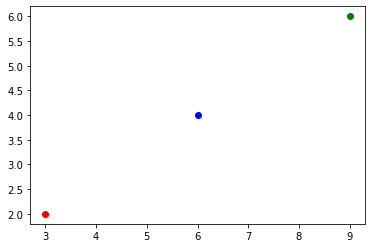

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#help(matplotlib.pyplot.scatter)

plt.scatter(3,2, color= "red")
plt.scatter(6,4, color = "blue")
plt.scatter(9,6, color = "green")
plt.show()

## Classes (basic)

Classes are a powerful way way to tie together data, and methods which act on that data. They also enable *inheritance*: the idea that we can build classes from other classes, inheriting there methods. Let's look at some examples to understand the basics.

### Data

Here we construct a class that defines a square with fixed side length

In [ ]:
class FixedSideLengthSquare(object):
    side_length = 4

We can create an instance of the square like this

In [ ]:
square = FixedSideLengthSquare()

And access it's properties using the "." notation

In [ ]:
square.side_length

<div class="alert alert-block alert-info">
<b>Note:</b> To help when reading the software, we name classes using pascal case naming (no spaces, each word capitalized, e.g. FixedSideLengthSquare), but we name instances in lower case.
</div>

### Methods

Classes can have *methods*. These are functions tied to the class. For example, here we add a method `area` to the `FixedSideLengthSquare` class:

In [ ]:
class FixedSideLengthSquare(object):
    side_length = 4
    
    def calculate_area(self):
        area = self.side_length * self.side_length
        return area
        
square = FixedSideLengthSquare()
print(square.calculate_area())

Note that all methods start with `self`. This is so they can access the data inside of themselves. But, you don't need to pass `self` when you call the method.

### Initialization

Often, we want to pass data in to our class. This requires an `__init__` method. For example, let's make the side-length a user input:

In [ ]:
class VariableSideLengthSquare(object):
    def __init__(self, side_length):
        self.side_length = side_length
    
    def calculate_area(self):
        area = self.side_length * self.side_length
        return area
    
square = VariableSideLengthSquare(5)
print(square.calculate_area())

## Data

In computational physics, we frequently need to store data. This might be the output of a simulation, or  data from a telescope/collider. Inside of a `python` program, it is often a good idea to collect data into a class. For example, let's say we have a time series of data recorded from a voltmeter, we could store it in a class like this

x-label:time
y-label:data
0.8414709848078965


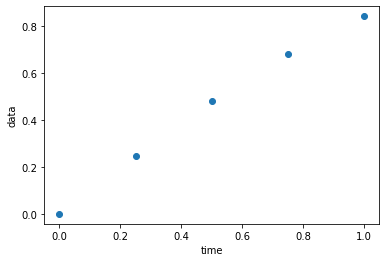

In [2]:
class VoltageTimeSeries(object):
    def __init__(self, times, data):
        """ An object to store data 
        
        Parameters
        ----------
        times: array
            The array of times in seconds
        data: array
            The array of recorded voltages in Volts
        """
        self.times = times
        self.data = data
        
    def maximum_voltage(self):
        """ Print the maximum voltage """
        print(np.max(self.data))
        
    def plot (self, times, data, xlabel, ylabel):
        plt.scatter(times, data)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.plot()
        
        
x = np.linspace(0, 1, 5)
y = np.sin(x)
xlabel = input("x-label:")
ylabel = input("y-label:")
timeseries = VoltageTimeSeries(x, y)
timeseries.maximum_voltage()
timeseries.plot(x,y, xlabel, ylabel)

The `TimeSeries` class stores the *data* : `times` and `data` and has a *method*: `maximum_voltage()` that can be called to print the maximum voltage.

<div class="alert alert-block alert-danger">
<b>Challenge 1.4:</b> Add `plot` method to the TimeSeries class which plots the data. Your method should add axis labels which can be set by the user or have default values.
</div>

## Storing and Reading Data

Now, you may want to store the times series data to disk for later analysis, or perhaps to publish it. There are many ways to do this. You should choose the best method for the problem. Here we give a quick overview of some common read/write formats, implemented as functions which accept a `TimeSeries` instance.

### Comma-separated-files (CSV)

A very common format is that of CSV files. For our example below, each row stores one time and one voltage and the two are separated by a comma. We store these to disc by using the `print()` command with the optional argument `file`, this writes the file.

In [ ]:
def use_print_to_write_a_csv(timeseries, filename):
    # Open the file for writing (w+)
    with open(filename, "w+") as file: 
        # Add a header to the file so people know what each column is
        print(f"#time[s],voltage[V]", file=file)
        
        # Loop over the rows and print them to the file
        for t, d in zip(timeseries.times, timeseries.data):
            print(f"{t},{d}", file=file)
        
use_print_to_write_a_csv(timeseries, "use_print_to_write_a_csv_example.csv")

Okay, let's have a look at what the file looks like (the `cat` command is a UNIX command to print the contents of a file)

In [ ]:
! cat use_print_to_write_a_csv_example.csv

Now, we can read that data back by opening the file, looping over the elements, and converting them:

In [ ]:
times = []
voltages = []
with open("use_print_to_write_a_csv_example.csv", "r") as file:
    for line in file:
        if line[0] == "#":
            pass
        else:
            t, v = line.split(',')
            times.append(float(t))
            voltages.append(float(v))

But, this is a lot of code for a simple program! Fortunately, many packages provide a nice means to read in files. We can use the `numpy` function [genfromtxt](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html). This is a very powerful module. Here we give it the filename, the "delimiter" (a comma). Then, we transpose it (the `.T` bit) to get two columns:

In [ ]:
time, voltage = np.genfromtxt("use_print_to_write_a_csv_example.csv", delimiter=",").T

In fact, `numpy` also 

In [ ]:
X = np.array([timeseries.times, timeseries.data]).T
np.savetxt("use_numpy_to_write_a_csv_example.csv", X, header="time[s],voltages[V]", delimiter=",")

In [ ]:
! cat use_numpy_to_write_a_csv_example.csv

<div class="alert alert-block alert-danger">
<b>Challenge 1.5:</b> Add `save_data` method to the TimeSeries class which writes the data to a csv file. Your method take as input the filename to use.
</div>

### Binary files

Comma-separated files (and by analogy, space-separated files) are great ways to store data because anyone can read/write them (E.g., you can open your CSV files in Excel). But, if you have several GBs of data, they are very wasteful. To this end, there are alternative ways to save data. One of them is the numpy `.npy` fileformat which works like this

In [ ]:
X = np.array([timeseries.times, timeseries.data])
np.save("use_numpy_to_write_a_npy_example.npy", X)
X_loaded = np.load("use_numpy_to_write_a_npy_example.npy")

# Check they are identical
X == X_loaded

<div class="alert alert-block alert-danger">
<b>Challenge 1.6:</b> Add an optional argument "format" to your "TimeSeries.save_data" method. If the user gives "format" as "csv"`, it should write a csv. If instead they give "format" as "npy" it should write a binary file.
</div>

## User input

Most programs need some level of user input. This could be to tell the program where to store the data, set the free parameters of the simulation, or even some optional arguments to change the simulation. As a concrete example, here is a python program using the beautifulsoup module to scrape the BBC's on this day archive site:

In [ ]:
%%writefile on_this_day_script.py

import requests
from bs4 import BeautifulSoup as bs

def get_bbc_on_this_day_headline(month, day):
    url = f"http://news.bbc.co.uk/onthisday/hi/dates/stories/{month}/{day}/default.stm"
    article = requests.get(url)
    soup = bs(article.content, "html.parser")
    print("Headlines at the BBC today:")
    print(soup.body.find(class_="h1").text)
    
get_bbc_on_this_day_headline("february", 20)

In [ ]:
! python on_this_day_script.py

But, the user may want to set the date themselves!

As with all things in python, there are many ways a user can provide these inputs (you could even program a website where they go an enter details!). Here we will discuss two.

### Command-line interface

Perhaps most frequently, your user may be running the program via a script in a terminal. Lets' modify the on this day script so the user can specify the month and day:

In [ ]:
%%writefile on_this_day_script.py

import argparse

import requests
from bs4 import BeautifulSoup as bs

def get_bbc_on_this_day_headline(month, day, print_URL=False):
    url = f"http://news.bbc.co.uk/onthisday/hi/dates/stories/{month}/{day}/default.stm"
    article = requests.get(url)
    soup = bs(article.content, "html.parser")
    print("Headlines at the BBC today:")
    print(soup.body.find(class_="h1").text)
    if print_URL:
        print(f"Find more information at: {url}")
    

def get_args():
    parser = argparse.ArgumentParser()
    parser.add_argument("--month", type=str, help="The month, given without abbreviation", required=True)
    parser.add_argument("--day", type=str, help="The day of the month, given as a numerical value", required=True)
    parser.add_argument("--print-URL",  action="store_true", help="If given, also print the URL so the user can follow the link")
    args = parser.parse_args()
    return args
    
    
# This line tells python to run the command if it is being called from the command line
if __name__ == "__main__":
    args = get_args()
    get_bbc_on_this_day_headline(month=args.month, day=args.day, print_URL=args.print_URL)

In [ ]:
! python on_this_day_script.py --month december --day 28 --print-URL

You may notice that there are required arguments and optional arguments (the `print-URL`). The line `__name__ == "__main__"` is arguably one of the uglier parts of python, you can read more about it [here](https://docs.python.org/3/library/__main__.html) and we'll see why it is useful in Notebook 3.

The command line interface enables the user to ask for help with the program

In [ ]:
! python on_this_day_script.py --help

<div class="alert alert-block alert-danger">
<b>Challenge 1.7:</b> Write a script with a command-line interface. The script should generate a random password for the user. The user should be able to set the length of the password (required) and if it should include upper-case letters (optional). There is a hint below.
</div>

*Hint*: We can convert an integer to letter of the alphabet with

In [ ]:
import string

N = 10
print(f"The {N}th letter of the alphabet is {string.ascii_lowercase[N]}")

*Hint*: We can convert a letter to uppercase with

In [ ]:
letter = "s"
letter.upper()

*Hint:* We can generate random numbers with

In [ ]:
import random
random.randint(0, 25)